In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("Advertising.csv")
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [6]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
data["Total_spend"] = data.TV + data.radio + data.newspaper
data.head()

,TV,radio,newspaper,sales,Total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


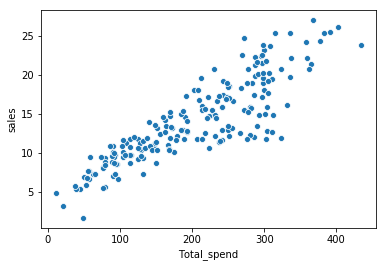

In [8]:
sns.scatterplot(data = data, x = "Total_spend", y = "sales")

In [9]:
data.corr()

,TV,radio,newspaper,sales,Total_spend
TV,1.000000,0.054809,0.056648,0.782224,0.945330
radio,0.054809,1.000000,0.354104,0.576223,0.293211
newspaper,0.056648,0.354104,1.000000,0.228299,0.343059
sales,0.782224,0.576223,0.228299,1.000000,0.867712
Total_spend,0.945330,0.293211,0.343059,0.867712,1.000000


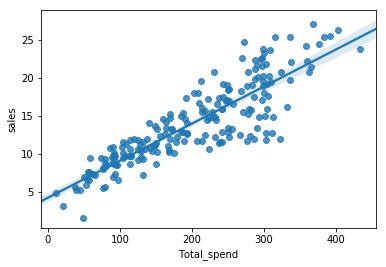

In [10]:
sns.regplot(data = data,x = "Total_spend", y = "sales" )

In [11]:
X = data.Total_spend
y= data.sales

In [12]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fitting po

In [13]:
# Formula y = B1x + B0
# It will return us a value of B1 and B0
formula = np.polyfit(X,y,deg = 1)
formula

array([0.04868788, 4.24302822])

In [14]:
potential_spend = np.linspace(0,500,100)

In [15]:
predicted_sales = 0.04868788* potential_spend + 4.24302822

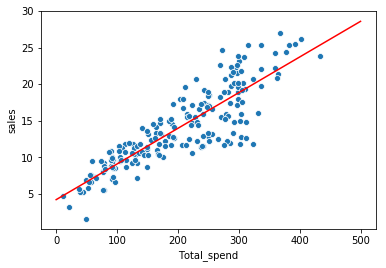

In [16]:
sns.scatterplot(data = data, x = 'Total_spend', y  ='sales')
plt.plot(potential_spend,predicted_sales, color = 'red')

In [17]:
spend = 200
predicted_sales = formula[0] * spend + formula[1]
predicted_sales

13.980604079845955

In [18]:
formula_of3 = np.polyfit(X,y,deg = 3)
formula_of3

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [19]:
# Instead of y = B1x + B0
# We solve y = B3X**3 + B2X**2 + BX + B0
B3,B2,B1,B0 = formula_of3[0],formula_of3[1],formula_of3[2],formula_of3[3]


In [20]:
pot_spend = np.linspace(0,500,100)

In [21]:
pred_sales  = B3 * pot_spend**3 + B2 * pot_spend**2 + B1*pot_spend + B0
B3

3.076150330479735e-07

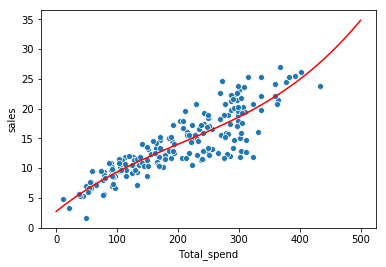

In [22]:
sns.scatterplot(data = data, x = 'Total_spend', y  ='sales')
plt.plot(pot_spend,pred_sales, color = 'red')

## Lets Predict Total Spend "250"

In [23]:
total_spend = 250
predict_for_input = B3*total_spend**3 + B2*total_spend**2 + B1 * total_spend + B0
predict_for_input

16.19656489076697